In [3]:
import cv2
import numpy as np

import fiftyone as fo
import fiftyone.brain as fob
import fiftyone.zoo as foz

In [6]:
dataset_dir = "/home/intern/Desktop/fiftyone_test/full_data"
name = "dataset"

In [7]:
# Create the dataset
dataset = fo.Dataset.from_dir(
    dataset_dir=dataset_dir,
    dataset_type=fo.types.ImageClassificationDirectoryTree, # Or ImageClassificationDirectoryTree for classification dataset
    name=name,
)

print(dataset)

 100% |███████████████| 3503/3503 [1.4s elapsed, 0s remaining, 2.5K samples/s]         
Name:        dataset
Media type:  image
Num samples: 3503
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)


In [8]:
# Compute 2D representation
# This will compute deep embeddings for all 10,000 images
results = fob.compute_visualization(
    dataset,
    num_dims=2,
    brain_key="image_embeddings",
    verbose=True,
    seed=51,
)

 100% |████|  108.4Mb/108.4Mb [2.1s elapsed, 0s remaining, 56.7Mb/s]      
Computing embeddings...


/home/intern/anaconda3/envs/fiftyone/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/intern/anaconda3/envs/fiftyone/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


 100% |███████████████| 3503/3503 [10.2m elapsed, 0s remaining, 6.1 samples/s]      
Generating visualization...


/home/intern/anaconda3/envs/fiftyone/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/intern/anaconda3/envs/fiftyone/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/intern/anaconda3/envs/fiftyone/lib/python3.10/site-packages/

UMAP(random_state=51, verbose=True)
Thu May 11 14:41:36 2023 Construct fuzzy simplicial set
Thu May 11 14:41:44 2023 Finding Nearest Neighbors
Thu May 11 14:41:47 2023 Finished Nearest Neighbor Search
Thu May 11 14:41:50 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu May 11 14:41:55 2023 Finished embedding



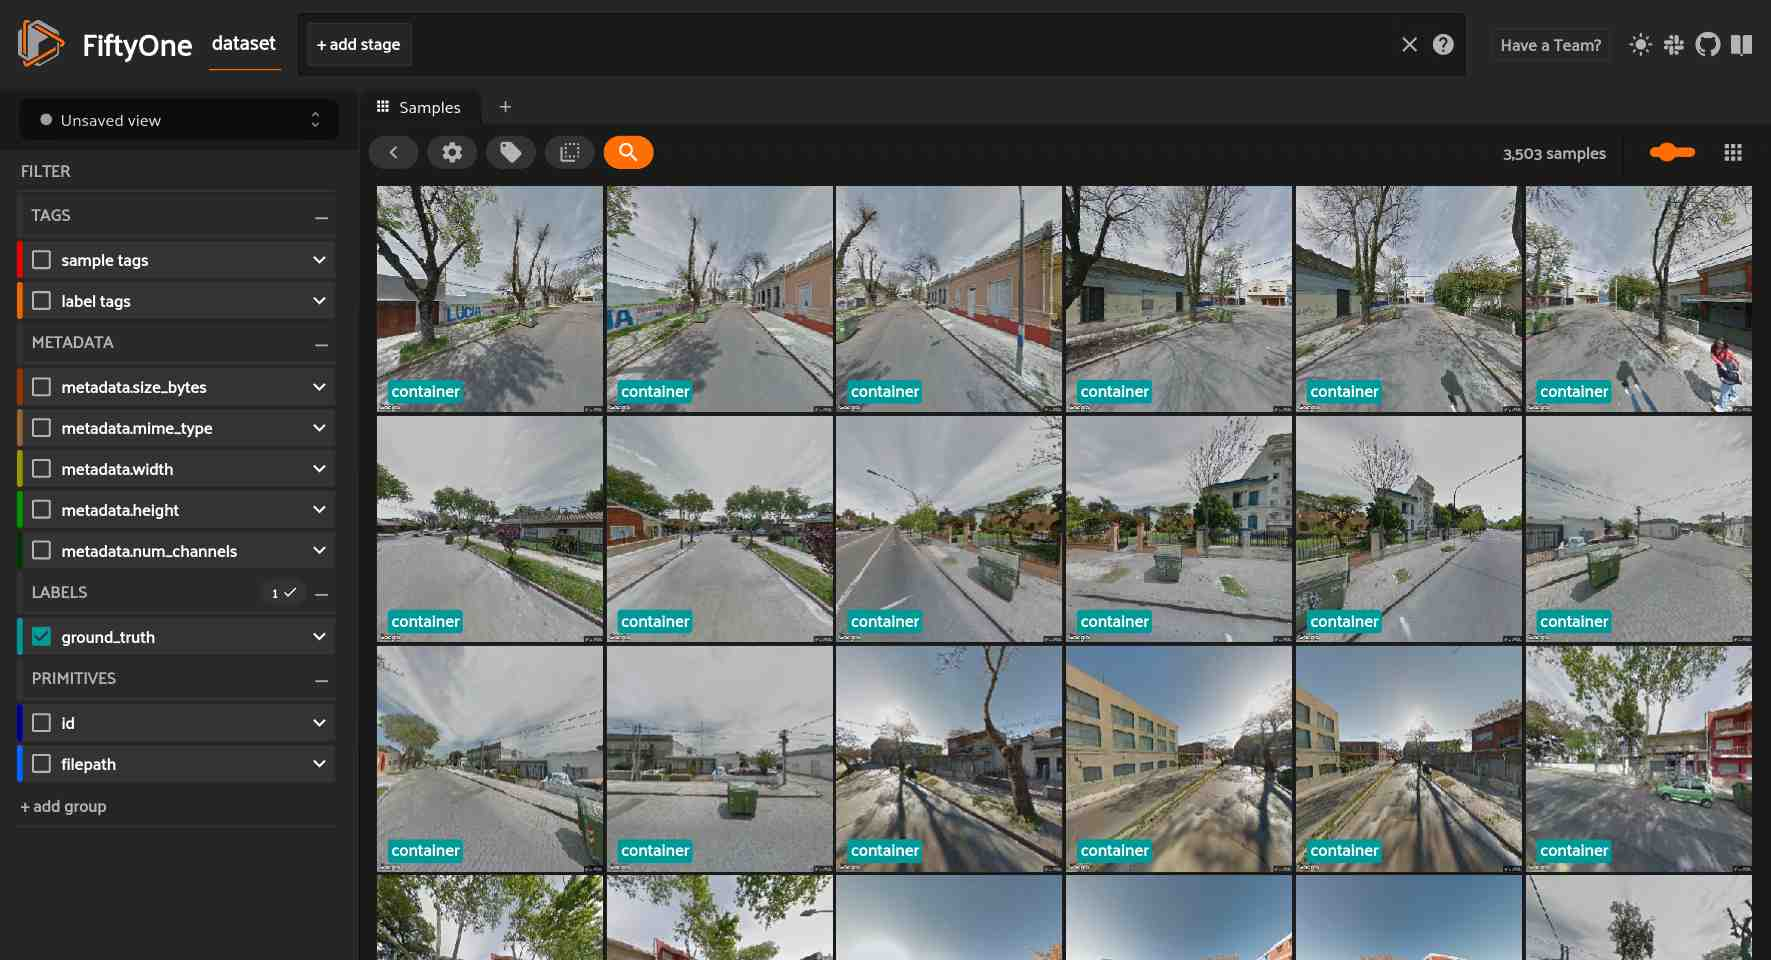

FigureWidget({
    'data': [{'customdata': array(['645cc1b5dd721f22a670791a', '645cc1b5dd721f22a670791d',
    …

In [12]:
session = fo.launch_app(dataset)

# Plot embeddings colored by ground truth label
plot = results.visualize(labels="ground_truth.label")
plot.show(height=720)

# Attach plot to session
session.plots.attach(plot)

In [ ]:
dataset = foz.load_zoo_dataset(
    "imagenet-sample",
    dataset_name=fo.get_default_dataset_name(),
    max_samples=50,
    shuffle=True,
)

model = foz.load_zoo_model("densenet121-imagenet-torch")

dataset.apply_model(model, label_field="predictions")

session = fo.launch_app(dataset)